In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

### Dataset

Seoul Bike Sharing Demand [Dataset]. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5F62R.

In [236]:
data_columns = [
    "bike_count",
    "hour",
    "temp",
    "humidity",
    "wind",
    "visibility",
    "dew_pt_temp",
    "radiation",
    "rain",
    "snow",
    "functional"
]

In [237]:
df = pd.read_csv("SeoulBikeData.csv", encoding="cp949").drop(["Date", "Holiday", "Seasons"], axis=1)

In [238]:
df.head()

,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [239]:
df.columns = data_columns
df['functional'] = (df['functional'] == "Yes").astype(int)
df = df[df["hour"]==12]

In [240]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,12,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,12,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,12,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,12,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


In [241]:
df = df.drop(["hour"], axis=1)

In [242]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


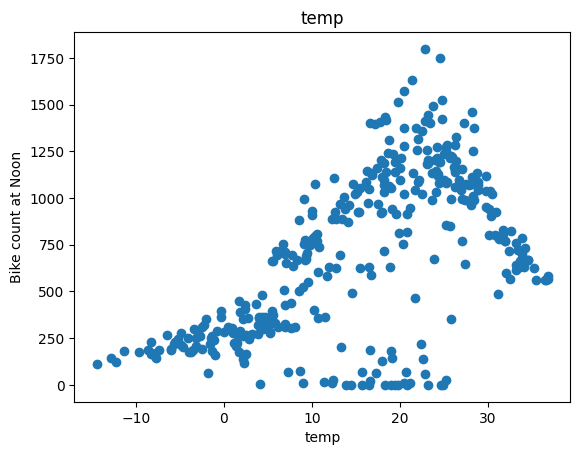

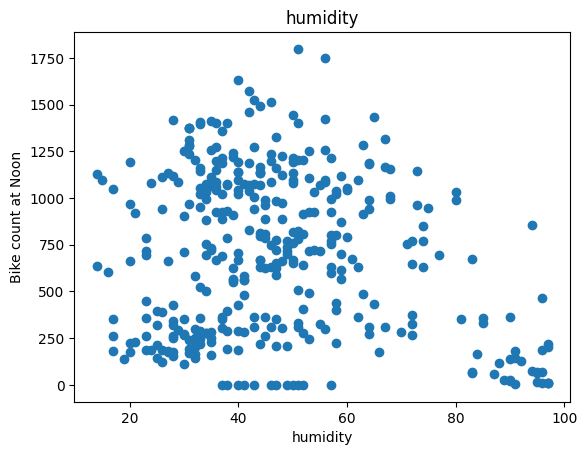

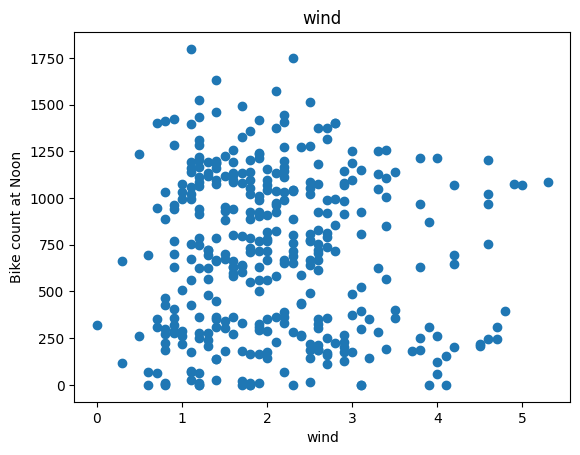

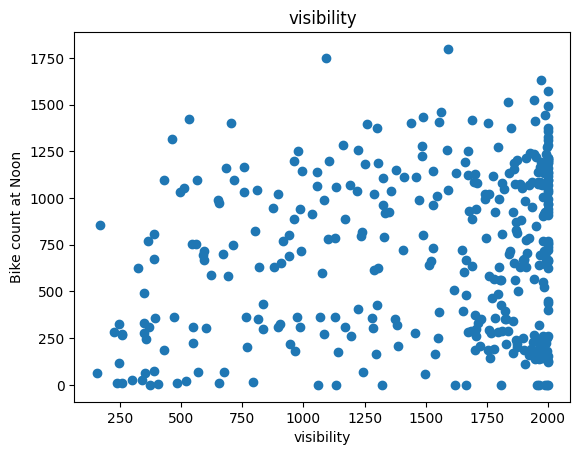

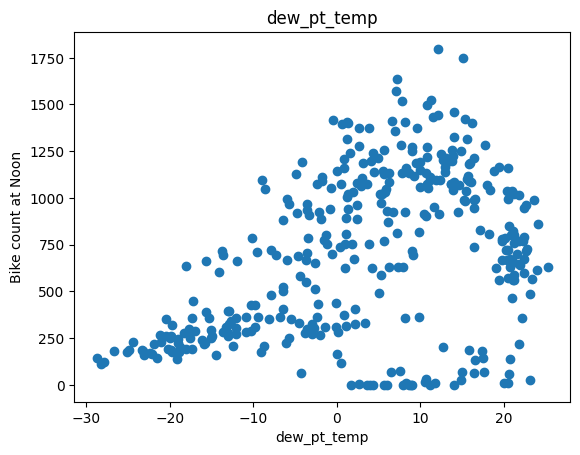

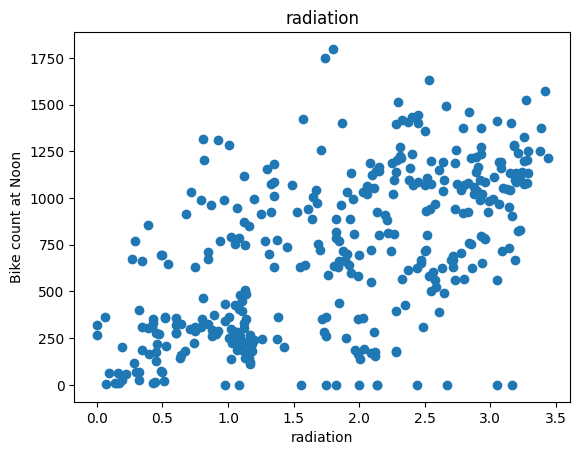

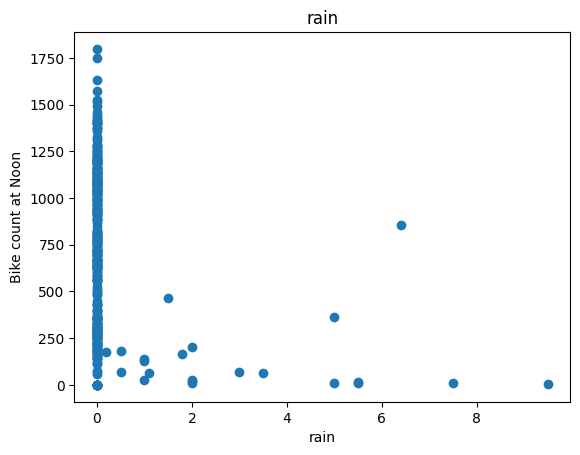

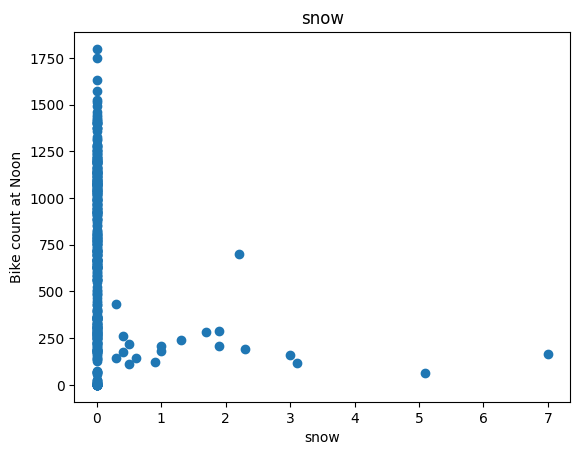

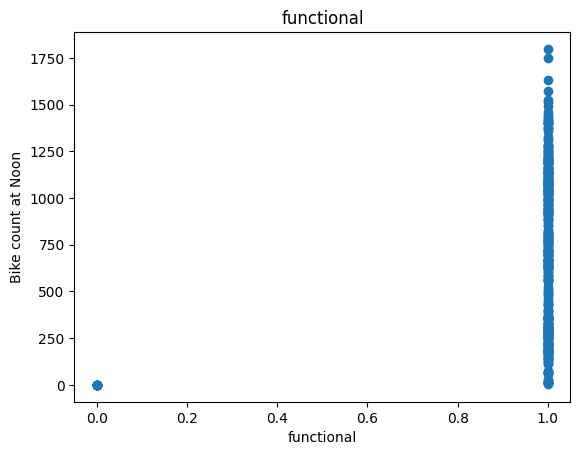

In [243]:
for label in df.columns[1:]:
    plt.scatter(df[label], df['bike_count'])
    plt.title(label)
    plt.ylabel("Bike count at Noon")
    plt.xlabel(label)
    plt.show()

In [244]:
df = df.drop(['wind', 'visibility','functional'], axis=1)

In [245]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


### Train / Valid / Test dataset

In [246]:
train, val, test, = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/Users/es/Library/Python/3.9/lib/python/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [247]:
def get_xy(dataframe, y_label, x_label=None):
    dataframe = copy.deepcopy(dataframe)
    if x_label is None:
        X = dataframe[[c for c in dataframe.colums if c!=y_label]].values #If x_label is not provided (None or empty), automatically use all columns except the target y_label as features.
    else:
        if len(x_label) == 1:
            X = dataframe[x_label[0]].values.reshape(-1,1)
        else:
            X = dataframe[x_label].values

    y = dataframe[y_label].values.reshape(-1,1) #rows & column
    data = np.hstack((X, y))

    return data, X, y

In [248]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_label=["temp"])
_, X_val_temp, y_val_temp = get_xy(val, "bike_count", x_label=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_label=["temp"])

In [249]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp,y_train_temp)

LinearRegression()

In [250]:
print(temp_reg.coef_, temp_reg.intercept_)

[[20.33626886]] [398.52881275]


In [251]:
temp_reg.score(X_test_temp,y_test_temp)

0.4542986063470916

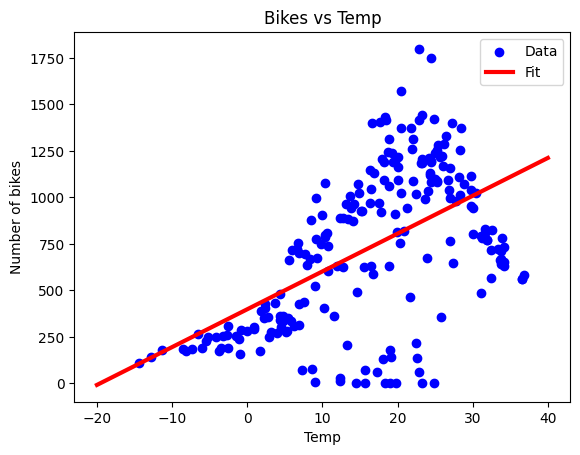

In [252]:
plt.scatter(X_train_temp,y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth= 3)
plt.legend()
plt.title('Bikes vs Temp')
plt.ylabel('Number of bikes')
plt.xlabel("Temp")
plt.show()

### Multi Linear Regression

In [253]:
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_label=df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, "bike_count", x_label=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_label=df.columns[1:])

In [254]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [255]:

all_reg.score(X_test_all, y_test_all)

0.5580062858898659

In [299]:
y_pred_lr = all_reg.predict(X_test_all)

# Regression with Neural Network

In [256]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis = None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

/Users/es/Library/Python/3.9/lib/python/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [257]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [258]:
temp_nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error'
)

In [259]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(X_val_temp,y_val_temp)
)

In [260]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')    
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()


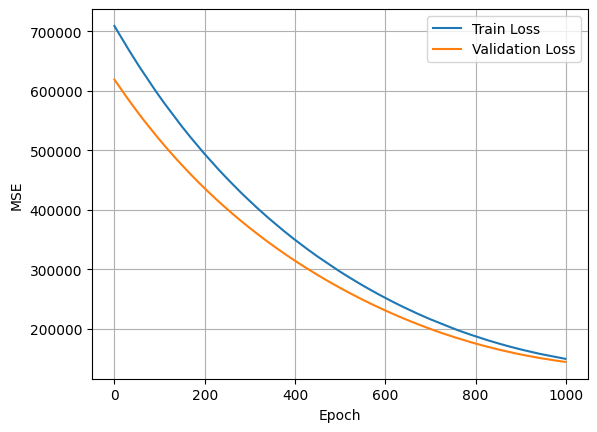

In [261]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


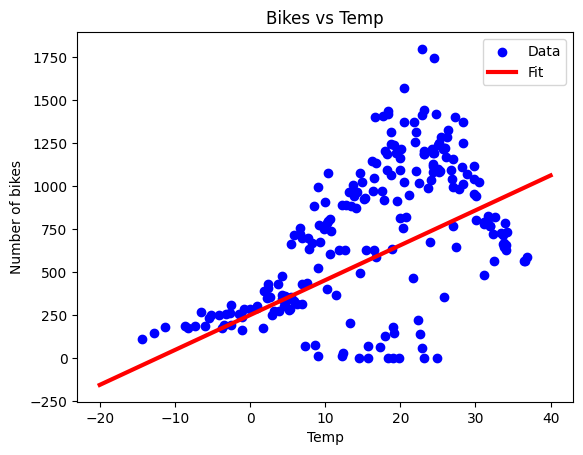

In [262]:
plt.scatter(X_train_temp,y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth= 3)
plt.legend()
plt.title('Bikes vs Temp')
plt.ylabel('Number of bikes')
plt.xlabel("Temp")
plt.show()

# Neural Network

In [263]:
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])

nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error'
)

In [264]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data=(X_val_temp,y_val_temp),
    verbose=0,
    epochs=100,
)

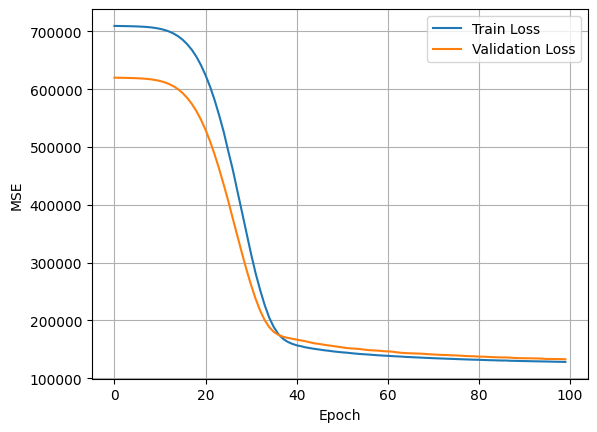

In [265]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


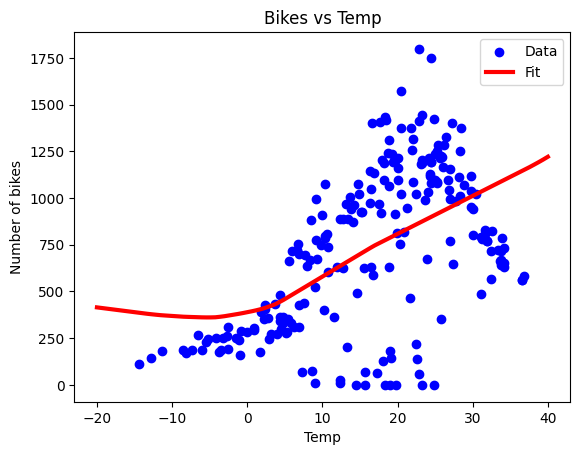

In [266]:
plt.scatter(X_train_temp,y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth= 3)
plt.legend()
plt.title('Bikes vs Temp')
plt.ylabel('Number of bikes')
plt.xlabel("Temp")
plt.show()

In [293]:
all_normalizer = tf.keras.layers.Normalization(axis=-1,input_shape=(6,),)
all_normalizer.adapt(X_train_all)

In [294]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])

nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error'
)

In [295]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    epochs=100,
    verbose=0
)

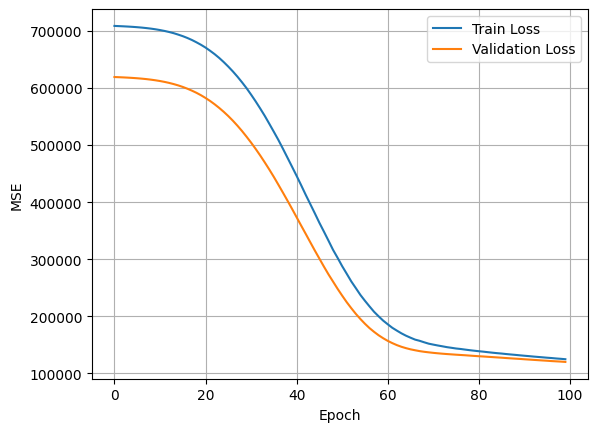

In [296]:
plot_loss(history)

In [300]:
#calculate the MSE for bot linear reg and nn
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [301]:
def MSE(y_pred, y_real):
    return (np.square(y_pred - y_real)).mean()

In [302]:
MSE(y_pred_lr,y_test_all)

np.float64(86166.92687293488)

In [303]:
MSE(y_pred_nn,y_test_all)

np.float64(97889.66177852332)

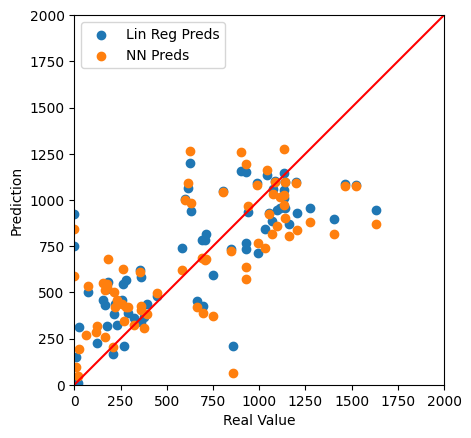

In [307]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label='Lin Reg Preds')
plt.scatter(y_test_all, y_pred_nn, label='NN Preds')
plt.xlabel("Real Value")
plt.ylabel('Prediction')
lims = [0,2000]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")